In [1]:
import os
import itertools
import pandas as pd

os.chdir('../..')

from modules.eval import *

In [ ]:
# os.chdir('./experiments/zirconium-dioxide')

# structures = load('results/mace/MACE-MP-0/structures.pkl')

# dft_forces_mace = load('results/mace/MACE-MP-0/dft_forces.pkl')
# dft_energies_mace = load('results/mace/MACE-MP-0/dft_energies.pkl')
# predicted_forces_mace = load('results/mace/MACE-MP-0/predicted_forces.pkl')
# predicted_energies_mace = load('results/mace/MACE-MP-0/predicted_energies.pkl')

In [2]:
os.chdir('./experiments/zirconium-dioxide')

structures = load('results/fair-chem-v2/UMA-Small/structures.pkl')

dft_forces_mace = load('results/fair-chem-v2/UMA-Small/dft_forces.pkl')
dft_energies_mace = load('results/fair-chem-v2/UMA-Small/dft_energies.pkl')
predicted_forces_mace = load('results/fair-chem-v2/UMA-Small/predicted_forces.pkl')
predicted_energies_mace = load('results/fair-chem-v2/UMA-Small/predicted_energies.pkl')

In [28]:
predicted_energies_copy = np.array(predicted_energies_mace) - 0.315

In [29]:
eval_report(dft_energies_mace,predicted_energies_copy)

(0.9532823501, 0.07265139669839857, 0.08649153117598708)

(-11.0, -5.0)

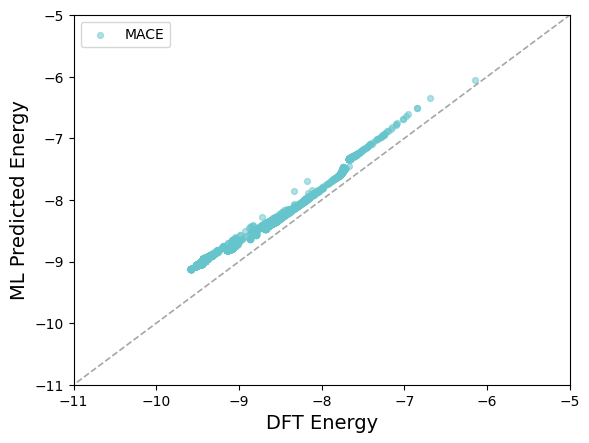

In [22]:
parity_plot(np.array(dft_energies_mace),np.array(predicted_energies_mace),'Energy','eV/atom',model='MACE')
plt.xlim(-11,-5)
plt.ylim(-11,-5)

In [5]:
def prop_plot(dft_list,prd_list,label,direction=None):

    dft_filtered = [dft for dft, keep in zip(dft_list, bools) if keep]
    prd_filtered = [prd for prd, keep in zip(prd_list, bools) if keep]

    geo_label = geo_labels[geo]

    if label == 'energy':
        parity_plot(np.array(dft_filtered),np.array(prd_filtered),'Energy','eV/atom',model=geo_label,style=i,legend=False)
        plt.grid()
        plt.xlim(-10,-6),plt.ylim(-10,-6)
    else:
        parity_plot(np.array(dft_filtered),np.array(prd_filtered),'Force','eV/angstrom',model=geo_label,style=i,legend=False)
        plt.grid()
        plt.xlim(-7.5,7.5)
        plt.ylim(-7.5,7.5)

        if direction == 'y': plt.legend(fontsize=12,bbox_to_anchor=[1.05,1.05])

r2,mae,rmse
(0.7331302814, 0.30649526600201576, 0.4184426833700751)
r2,mae,rmse
(0.7331302814, 0.30649526600201576, 0.4184426833700751)
r2,mae,rmse
(0.7331302814, 0.30649526600201576, 0.4184426833700751)
r2,mae,rmse
(0.7331302814, 0.30649526600201576, 0.4184426833700751)
r2,mae,rmse
(0.7331302814, 0.30649526600201576, 0.4184426833700751)


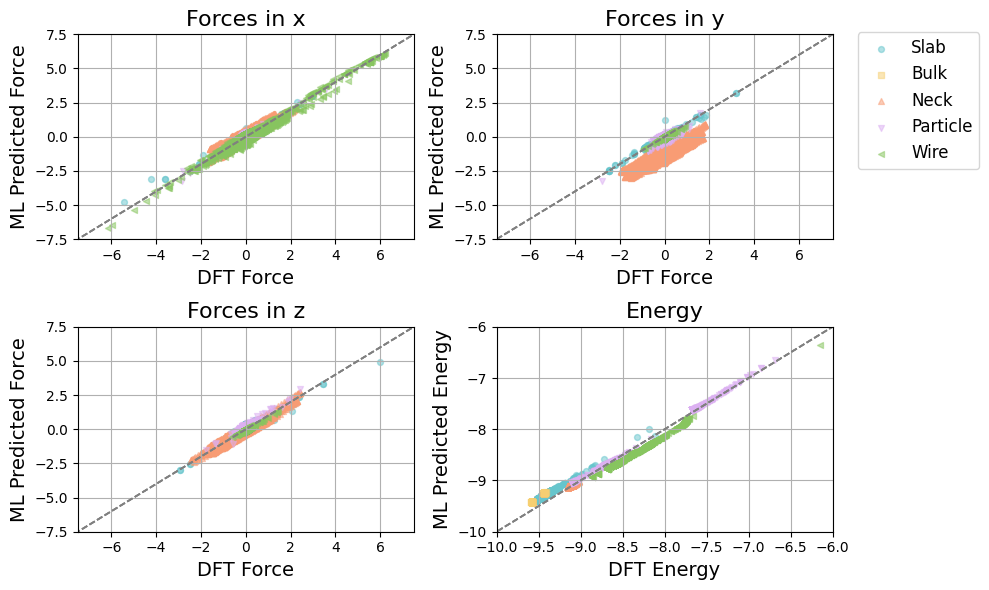

In [23]:
s_initials = [s[0] for s in structures]
energies_geo = {}

geometries = set(s_initials)
geo_labels = {'n':'Neck','w':'Wire','p':'Particle','b':'Bulk','s':'Slab'}

plt.figure(figsize=(10,6))

for i,geo in enumerate(geometries):

    count = 1

    bools = [s_test==geo for s_test in s_initials]

    # for j,(dft,prd,forces) in enumerate(zip([dft_forces_mace,dft_energies_mace],[predicted_forces_mace,predicted_energies_mace],[True,False])):
    for j,(dft,prd,forces) in enumerate(zip([dft_forces_mace,dft_energies_mace],[predicted_forces_mace,predicted_energies_copy],[True,False])):

        if forces:
            
            for k,(label,dft_f,prd_f) in enumerate(zip(['module','x','y','z'],forces_load(dft),forces_load(prd))):

                if label == 'module':
                    print('r2,mae,rmse')
                    print(eval_report(dft_f,prd_f))

                if k != 0:

                    plt.subplot(2,2,count)
                    plt.title(f'Forces in {label}',fontsize=16)
                    prop_plot(dft_f,prd_f,'forces',direction=label)
                    count += 1

        else:
            
            plt.subplot(2,2,count)
            plt.title('Energy',fontsize=16)
            prop_plot(dft,prd,'energy')
            count += 1

    # _, _, rmse = eval_report(dft_filtered,prd_filtered)

plt.tight_layout()
# plt.savefig('figures/parity_geometries.png',dpi=300,transparent=True)

plt.show()